### California Housing Price Prediction  
  
1. Rakandhiya Daanii Rachmanto (20.11.3304)  
2. Azzila Isme Karen (20.11.3312)  
3. Sandy Wildani Bachtiar (20.11.3333)  
4. Muhammad Abiyyu (20.11.3346)  
5. Bombong Nur Margo Seto (20.11.3358)  


### Load Dataset

In [ ]:
# Utilities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_housing = pd.read_csv('/content/drive/MyDrive/BigDataCalif/housing_sample.csv')

df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
#Shape of dataset
df_housing.shape

(1500, 10)

In [ ]:
#Dataset description
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,1500.000000,1500.000000,1500.000000,1500.000000,1490.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,-121.997753,38.015840,33.269333,2484.130667,495.453691,1232.759333,465.179333,3.692702,185511.474667
std,0.361203,0.596194,14.106126,2053.703692,384.031633,981.235142,363.246117,1.692344,87249.839293
min,-122.510000,37.470000,2.000000,12.000000,4.000000,18.000000,7.000000,0.499900,39400.000000
25%,-122.220000,37.710000,22.000000,1348.750000,273.000000,672.750000,259.000000,2.494975,117800.000000
50%,-122.090000,37.810000,35.000000,2017.000000,397.000000,987.000000,375.000000,3.362150,173850.000000
75%,-121.917500,37.980000,46.000000,2983.250000,591.750000,1475.250000,548.500000,4.711175,231375.000000
max,-119.780000,40.060000,52.000000,28258.000000,3864.000000,12203.000000,3701.000000,13.499000,500001.000000


In [ ]:
# Get data types of each column
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           1500 non-null   float64
 1   latitude            1500 non-null   float64
 2   housing_median_age  1500 non-null   float64
 3   total_rooms         1500 non-null   float64
 4   total_bedrooms      1490 non-null   float64
 5   population          1500 non-null   float64
 6   households          1500 non-null   float64
 7   median_income       1500 non-null   float64
 8   median_house_value  1500 non-null   float64
 9   ocean_proximity     1500 non-null   object 
dtypes: float64(9), object(1)
memory usage: 117.3+ KB


### Pre-Processing

In [ ]:
# Check missing values
df_housing.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        10
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity        0
dtype: int64

In [ ]:
# Drop NaN values
df_housing = df_housing.dropna()

In [ ]:
# Drop Unused columns
df_housing.drop(['latitude', 'longitude', 'ocean_proximity'], axis=1, inplace=True)

# Convert data types
df_housing['housing_median_age'] = df_housing.housing_median_age.astype(int)
df_housing['total_rooms'] = df_housing.total_rooms.astype(int)
df_housing['total_bedrooms'] = df_housing.total_bedrooms.astype(int)
df_housing['population'] = df_housing.population.astype(int)
df_housing['households'] = df_housing.households.astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

#### Drop Outlier

In [ ]:
# Drop outliers for total_rooms
Q1 = np.percentile(df_housing['total_rooms'], 25, interpolation='midpoint')
Q3 = np.percentile(df_housing['total_rooms'], 75, interpolation='midpoint')

IQR = Q3 - Q1

print('Old shape: ', df_housing.shape)

upper = np.where(df_housing['total_rooms'] >= (Q3 + 1.5 * IQR))
lower = np.where(df_housing['total_rooms'] <= (Q1 - 1.5 * IQR))

df_housing.drop(upper[0], inplace=True)
df_housing.drop(lower[0], inplace=True)

print('New shape: ', df_housing.shape)

Old shape:  (1490, 7)
New shape:  (1399, 7)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Drop outliers for total_bedrooms
Q1 = np.percentile(df_housing['total_bedrooms'], 25, interpolation='midpoint')
Q3 = np.percentile(df_housing['total_bedrooms'], 75, interpolation='midpoint')

IQR = Q3 - Q1

print('Old shape: ', df_housing.shape)

upper = np.where(df_housing['total_bedrooms'] >= (Q3 + 1.5 * IQR))
lower = np.where(df_housing['total_bedrooms'] <= (Q1 - 1.5 * IQR))

df_housing.drop(upper[0], inplace=True, errors='ignore')
df_housing.drop(lower[0], inplace=True, errors='ignore')

print('New shape: ', df_housing.shape)

Old shape:  (1399, 7)
New shape:  (1316, 7)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Drop outliers for population
Q1 = np.percentile(df_housing['population'], 25, interpolation='midpoint')
Q3 = np.percentile(df_housing['population'], 75, interpolation='midpoint')

IQR = Q3 - Q1

print('Old shape: ', df_housing.shape)

upper = np.where(df_housing['population'] >= (Q3 + 1.5 * IQR))
lower = np.where(df_housing['population'] <= (Q1 - 1.5 * IQR))

df_housing.drop(upper[0], inplace=True, errors='ignore')
df_housing.drop(lower[0], inplace=True, errors='ignore')

print('New shape: ', df_housing.shape)

Old shape:  (1316, 7)
New shape:  (1248, 7)


In [ ]:
# Drop outliers for households
Q1 = np.percentile(df_housing['households'], 25, interpolation='midpoint')
Q3 = np.percentile(df_housing['households'], 75, interpolation='midpoint')

IQR = Q3 - Q1

print('Old shape: ', df_housing.shape)

upper = np.where(df_housing['households'] >= (Q3 + 1.5 * IQR))
lower = np.where(df_housing['households'] <= (Q1 - 1.5 * IQR))

df_housing.drop(upper[0], inplace=True, errors='ignore')
df_housing.drop(lower[0], inplace=True, errors='ignore')

print('New shape: ', df_housing.shape)

Old shape:  (1248, 7)
New shape:  (1190, 7)


In [ ]:
# Drop outliers for median_income
Q1 = np.percentile(df_housing['median_income'], 25, interpolation='midpoint')
Q3 = np.percentile(df_housing['median_income'], 75, interpolation='midpoint')

IQR = Q3 - Q1

print('Old shape: ', df_housing.shape)

upper = np.where(df_housing['median_income'] >= (Q3 + 1.5 * IQR))
lower = np.where(df_housing['median_income'] <= (Q1 - 1.5 * IQR))

df_housing.drop(upper[0], inplace=True, errors='ignore')
df_housing.drop(lower[0], inplace=True, errors='ignore')

print('New shape: ', df_housing.shape)

Old shape:  (1190, 7)
New shape:  (1175, 7)


### Initial Dataset Distribution

Text(0.5, 0, 'Housing Median Age')

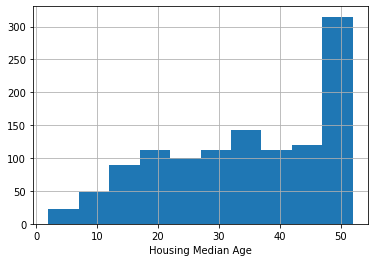

In [ ]:
df_housing['housing_median_age'].hist()
plt.xlabel('Housing Median Age')

Text(0.5, 0, 'Total Rooms')

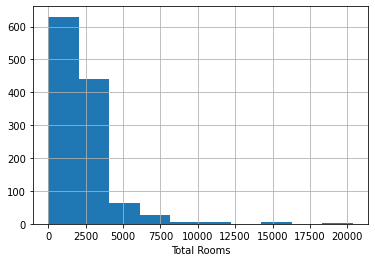

In [ ]:
df_housing['total_rooms'].hist()
plt.xlabel('Total Rooms')

Text(0.5, 0, 'Total Bed Rooms')

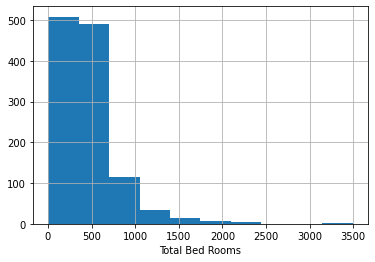

In [ ]:
df_housing['total_bedrooms'].hist()
plt.xlabel('Total Bed Rooms')

Text(0.5, 0, 'Population')

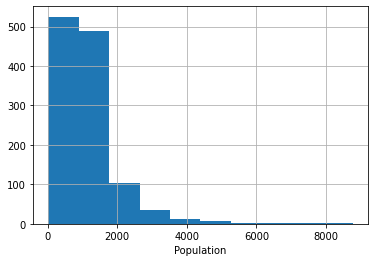

In [ ]:
df_housing['population'].hist()
plt.xlabel('Population')

Text(0.5, 0, 'Households')

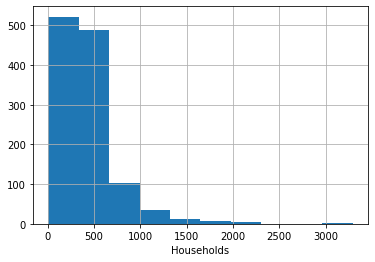

In [ ]:
df_housing['households'].hist()
plt.xlabel('Households')

Text(0.5, 0, 'Median Income')

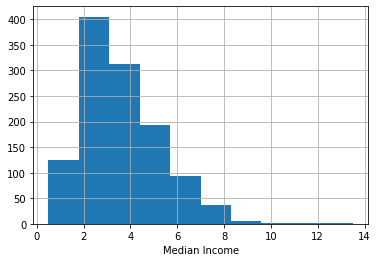

In [ ]:
df_housing['median_income'].hist()
plt.xlabel('Median Income')

Text(0.5, 0, 'Median House Value')

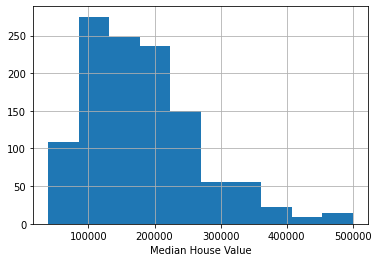

In [ ]:
df_housing['median_house_value'].hist()
plt.xlabel('Median House Value')

### Correlation

In [ ]:
# Import library
import seaborn as sbs

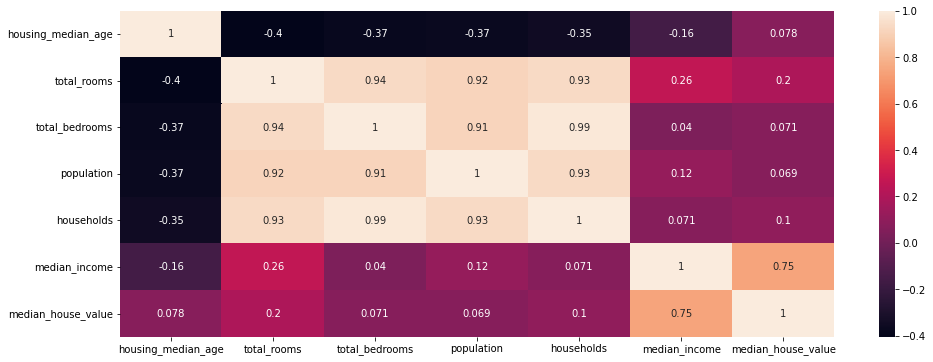

In [ ]:
# Display correlation data
plt.figure(figsize=(16, 6))

sbs.heatmap(df_housing.corr(), annot=True)
plt.show()

## Regression 1


In [ ]:
X = df_housing[['total_rooms', 'population', 'median_income']]
y = df_housing['median_house_value']

print(X.shape)
print(y.shape)

(1175, 3)
(1175,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(822, 3)
(822,)
(353, 3)
(353,)


In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_prediction_result = linreg.predict(X_test)

In [ ]:
y_test

1246    112500.0
1345    162200.0
1143     87500.0
1475    166700.0
231     203300.0
          ...   
304      97300.0
199      71300.0
1188     49000.0
16      152500.0
1296    150800.0
Name: median_house_value, Length: 353, dtype: float64

#### Evaluasi Regresi

In [ ]:
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), y_prediction_result))
mae = metrics.mean_absolute_error(np.array(y_test), y_prediction_result)
mape = metrics.mean_absolute_percentage_error(np.array(y_test), y_prediction_result)
RAE = (np.sum(abs(y_test - y_prediction_result)))/(np.sum(abs(y_test - np.mean(y_test))))
RSE = np.sum(np.square(y_test - y_prediction_result)) / np.sum(np.square(y_test - y_prediction_result))


print(f"RAE : {RAE}")
print(f"RSE : {RSE}")
print(f"MAE : {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

RAE : 0.617169708798046
RSE : 1.0
MAE : 43163.68523618207
RMSE: 59512.0549807355
MAPE: 0.2917836865338063


##Regression 2

In [ ]:
X = df_housing[['total_rooms', 'households', 'median_income']]
y = df_housing['median_house_value']

print(X.shape)
print(y.shape)

(1175, 3)
(1175,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(822, 3)
(822,)
(353, 3)
(353,)


In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_prediction_result = linreg.predict(X_test)

In [ ]:
y_test

1246    112500.0
1345    162200.0
1143     87500.0
1475    166700.0
231     203300.0
          ...   
304      97300.0
199      71300.0
1188     49000.0
16      152500.0
1296    150800.0
Name: median_house_value, Length: 353, dtype: float64

####Evaluasi Regression

In [ ]:
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), y_prediction_result))
mae = metrics.mean_absolute_error(np.array(y_test), y_prediction_result)
mape = metrics.mean_absolute_percentage_error(np.array(y_test), y_prediction_result)
RAE = (np.sum(abs(y_test - y_prediction_result)))/(np.sum(abs(y_test - np.mean(y_test))))
RSE = np.sum(np.square(y_test - y_prediction_result)) / np.sum(np.square(y_test - y_prediction_result))


print(f"RAE : {RAE}")
print(f"RSE : {RSE}")
print(f"MAE : {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

RAE : 0.5974109465182406
RSE : 1.0
MAE : 41781.79467424403
RMSE: 58192.41639546903
MAPE: 0.2714872178900888


## Regression 3

In [ ]:
X = df_housing[['total_rooms', 'total_bedrooms', 'median_income']]
y = df_housing['median_house_value']

print(X.shape)
print(y.shape)

(1175, 3)
(1175,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(822, 3)
(822,)
(353, 3)
(353,)


In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_prediction_result = linreg.predict(X_test)

In [ ]:
y_test

1246    112500.0
1345    162200.0
1143     87500.0
1475    166700.0
231     203300.0
          ...   
304      97300.0
199      71300.0
1188     49000.0
16      152500.0
1296    150800.0
Name: median_house_value, Length: 353, dtype: float64

####Evaluasi Regression

In [ ]:
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), y_prediction_result))
mae = metrics.mean_absolute_error(np.array(y_test), y_prediction_result)
mape = metrics.mean_absolute_percentage_error(np.array(y_test), y_prediction_result)
RAE = (np.sum(abs(y_test - y_prediction_result)))/(np.sum(abs(y_test - np.mean(y_test))))
RSE = np.sum(np.square(y_test - y_prediction_result)) / np.sum(np.square(y_test - y_prediction_result))


print(f"RAE : {RAE}")
print(f"RSE : {RSE}")
print(f"MAE : {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

RAE : 0.605215551596583
RSE : 1.0
MAE : 42327.63403121823
RMSE: 58543.219546059416
MAPE: 0.27771718202068624


##Regression 4

In [ ]:
X = df_housing[['total_rooms', 'total_bedrooms','population', 'households', 'median_income']]
y = df_housing['median_house_value']

print(X.shape)
print(y.shape)

(1175, 5)
(1175,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(822, 5)
(822,)
(353, 5)
(353,)


In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_prediction_result = linreg.predict(X_test)
y_test

1246    112500.0
1345    162200.0
1143     87500.0
1475    166700.0
231     203300.0
          ...   
304      97300.0
199      71300.0
1188     49000.0
16      152500.0
1296    150800.0
Name: median_house_value, Length: 353, dtype: float64

In [ ]:
print('Prediction result : ', y_prediction_result[0])
print('Actual Prediction : ', y_test.values[0])

Prediction result :  155578.17640540094
Actual Prediction :  112500.0


In [ ]:
linreg.score (X_test, y_test)

0.592195914197398

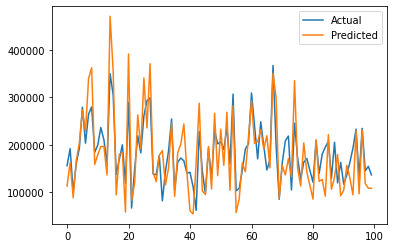

In [ ]:
diagram = pd.DataFrame({'Predicted':y_prediction_result,'Actual':y_test})
diagram = diagram.reset_index()
diagram = diagram.drop(['index'],axis=1)
plt.plot(diagram[:100])
plt.legend(['Actual','Predicted'])

####Evaluasi Regression

In [ ]:
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), y_prediction_result))
mae = metrics.mean_absolute_error(np.array(y_test), y_prediction_result)
mape = metrics.mean_absolute_percentage_error(np.array(y_test), y_prediction_result)
RAE = (np.sum(abs(y_test - y_prediction_result)))/(np.sum(abs(y_test - np.mean(y_test))))
RSE = np.sum(np.square(y_test - y_prediction_result)) / np.sum(np.square(y_test - y_prediction_result))


print(f"RAE : {RAE}")
print(f"RSE : {RSE}")
print(f"MAE : {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

RAE : 0.5727392943559585
RSE : 1.0
MAE : 40056.305861348024
RMSE: 56749.73621900547
MAPE: 0.2639098704873578


##Regression 5

In [ ]:
X = df_housing[['total_rooms', 'total_bedrooms','population', 'households', 'median_income', 'housing_median_age']]
y = df_housing['median_house_value']

print(X.shape)
print(y.shape)

(1175, 6)
(1175,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(822, 6)
(822,)
(353, 6)
(353,)


In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_prediction_result = linreg.predict(X_test)
y_test

1246    112500.0
1345    162200.0
1143     87500.0
1475    166700.0
231     203300.0
          ...   
304      97300.0
199      71300.0
1188     49000.0
16      152500.0
1296    150800.0
Name: median_house_value, Length: 353, dtype: float64

In [ ]:
print('Prediction result : ', y_prediction_result[0])
print('Actual Prediction : ', y_test.values[0])

Prediction result :  169204.73652823933
Actual Prediction :  112500.0


In [ ]:
linreg.score (X_test, y_test)

0.6213691751983528

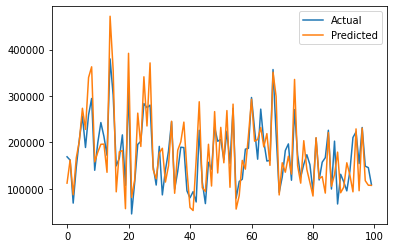

In [ ]:
diagram = pd.DataFrame({'Predicted':y_prediction_result,'Actual':y_test})
diagram = diagram.reset_index()
diagram = diagram.drop(['index'],axis=1)
plt.plot(diagram[:100])
plt.legend(['Actual','Predicted'])

In [ ]:
y_prediction_result = linreg.predict(X_test)

####Evaluasi Regression


In [ ]:
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), y_prediction_result))
mae = metrics.mean_absolute_error(np.array(y_test), y_prediction_result)
mape = metrics.mean_absolute_percentage_error(np.array(y_test), y_prediction_result)
RAE = (np.sum(abs(y_test - y_prediction_result)))/(np.sum(abs(y_test - np.mean(y_test))))
RSE = np.sum(np.square(y_test - y_prediction_result)) / np.sum(np.square(y_test - y_prediction_result))


print(f"RAE : {RAE}")
print(f"RSE : {RSE}")
print(f"MAE : {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

RAE : 0.5527821271490787
RSE : 1.0
MAE : 38660.53923307124
RMSE: 54682.2082646867
MAPE: 0.24807642072357955
